# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.head(5)


,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [105]:
# 1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e 
# através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te
# faça sentido.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   index                  15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12466 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  mau                    15000 non-null  bool   
 14  renda                  15000 non-null  float64
dtypes:

In [106]:
df_quanti = df[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]
df_quanti.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


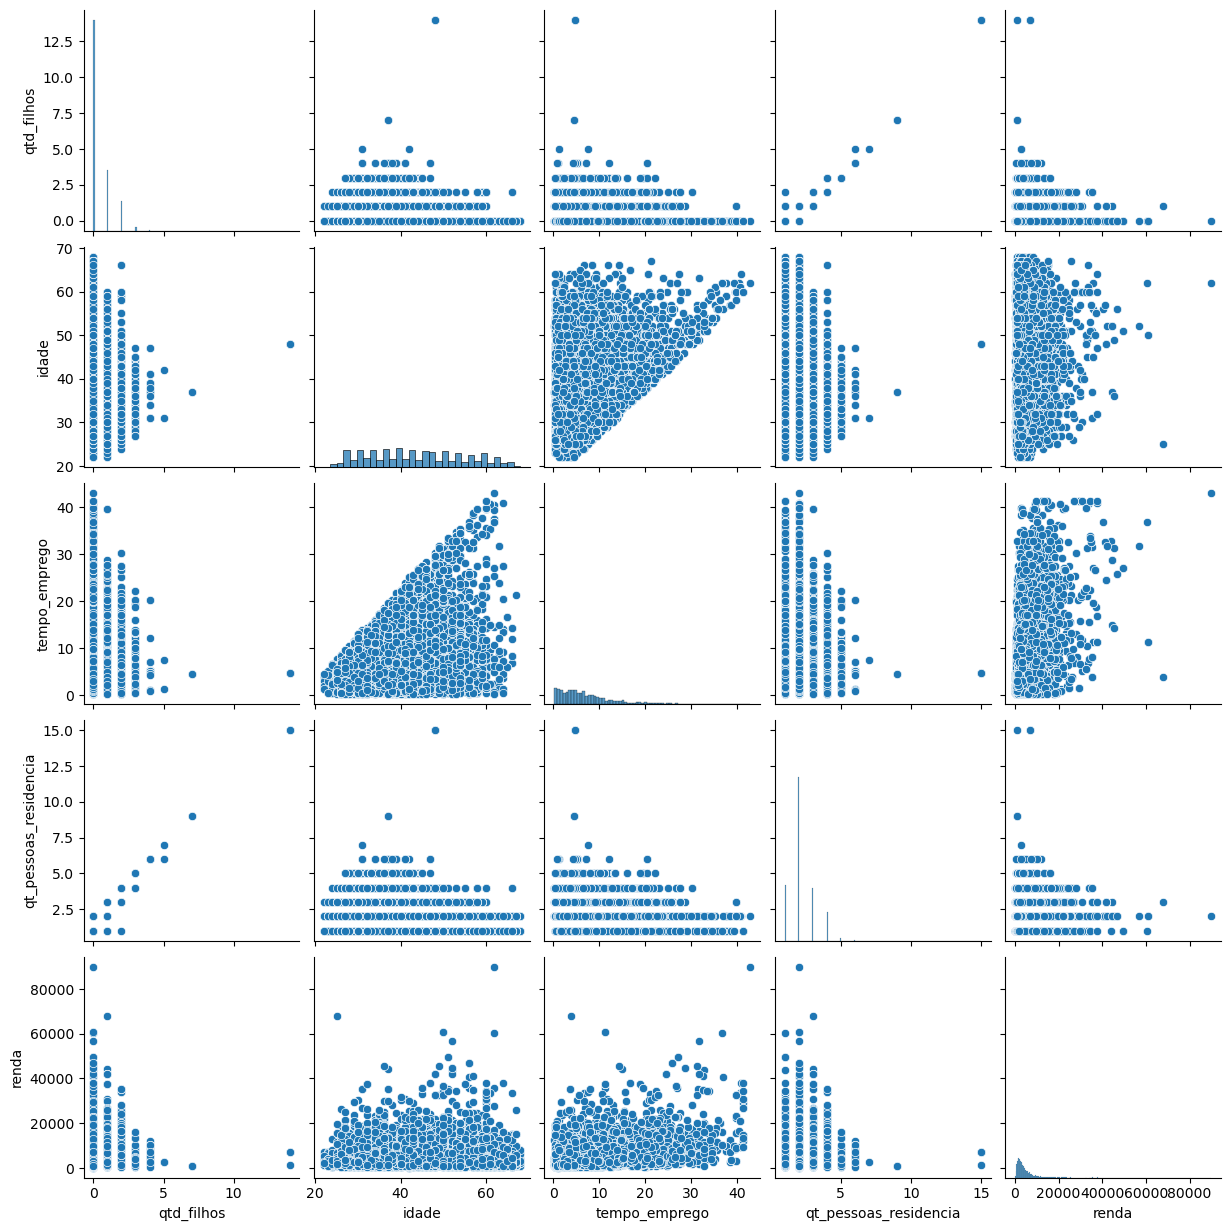

In [107]:
sns.pairplot(df_quanti)
plt.show()

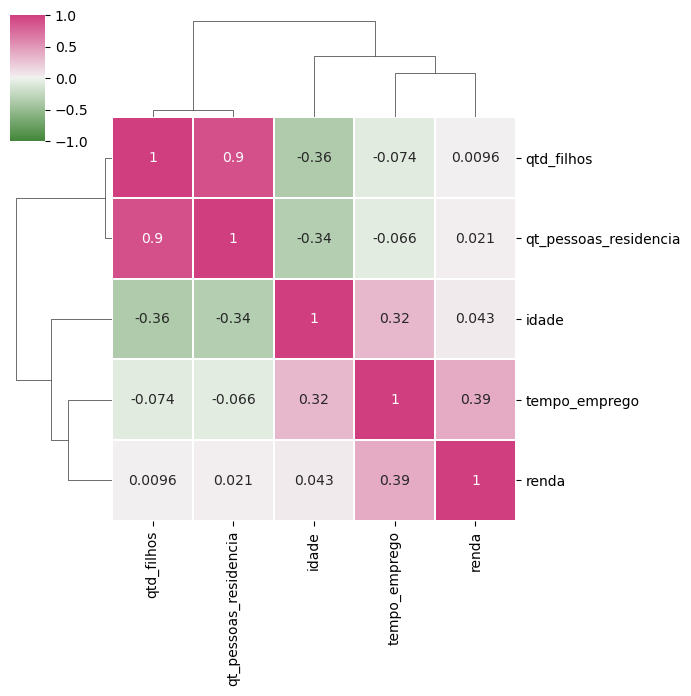

In [108]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 1, center = 'light')
sns.clustermap(df_quanti.corr(), figsize=(7, 7), center = 0, cmap=cmap, vmin=-1, vmax=1, linewidths=0.01, annot=True,
   )
plt.show()

Avaliando a estrutura de correlação das variáveis quantitativas conforme solicitado percebi que:
    1 - A maior correlaçção existe entre a quantidade de filhos e quantidade de pessoas na residência.
    2 - Estranho ver que todas as outras correlações são menores de 0.5.
    3 - As duas variáveis que mais se correlacionam com renda são tempo de emprego e idade, esta última minimamente correlacionada.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [109]:
# Percebo que até cerca dos 50 anos o tempo de emprego segue, relativamente, segue junto com a idade!

import plotly.express as px
fig = px.scatter(df_quanti, x = 'idade', opacity=0.5, y = 'tempo_emprego', width = 800)
fig.show()

3) Na su aopinião, há outliers na variável renda?

In [121]:
# Analisando com o método discribe, percebo que o maior valor da renda é quase o dobro da média.

df_quanti[['renda']].describe()

,renda
count,15000.000000
mean,4624.632946
std,4628.571729
min,159.900000
25%,1945.740000
50%,3278.260000
75%,5642.365000
max,89918.040000


In [154]:
# Analisando de forma gráfica, cruzando idade X renda, é possível visualisar alguns utliers. 
# Um deles bem destacado, onde mostra a idade=62 e a renda=89.91804K (Posicionar o mouse no ponto para ver o valor)

fig = px.scatter(df_quanti, x = 'idade', opacity=0.5, y = 'renda', width = 800)
fig.show()

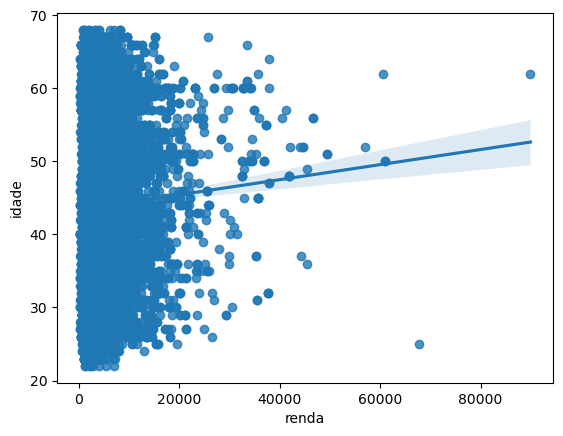

In [153]:
sns.regplot(x=df_quanti[['renda']], y=df_quanti[['idade']], data = df_quanti)
plt.show()

4) Calcule o logaritmo da variável renda e repita a sequência de análise

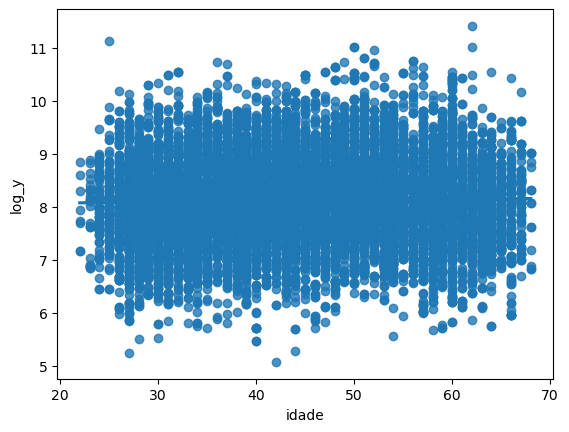

In [162]:
df_log = df_quanti.copy()
df_log['log_y'] = np.log(df_quanti['renda'])

_ = sns.regplot(x='idade', y='log_y', data = df_log)
plt.show()

In [159]:
df_log.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_y
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
log_y,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


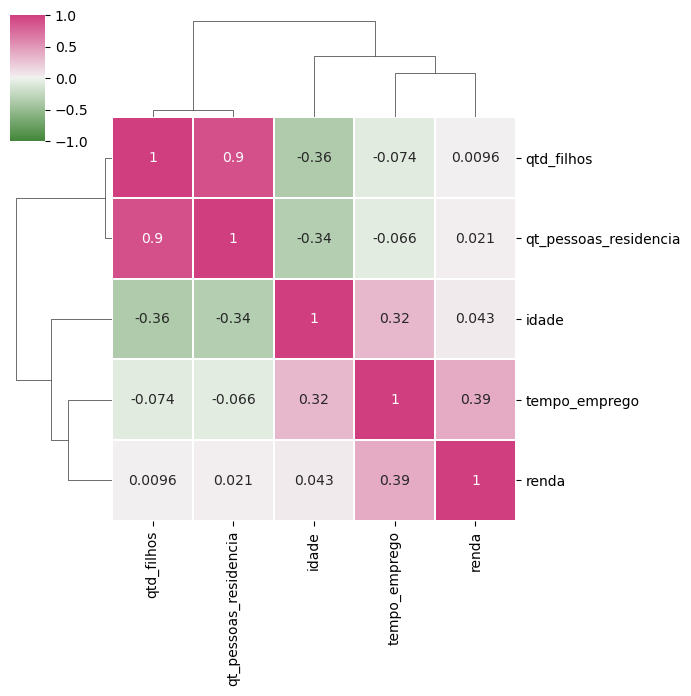

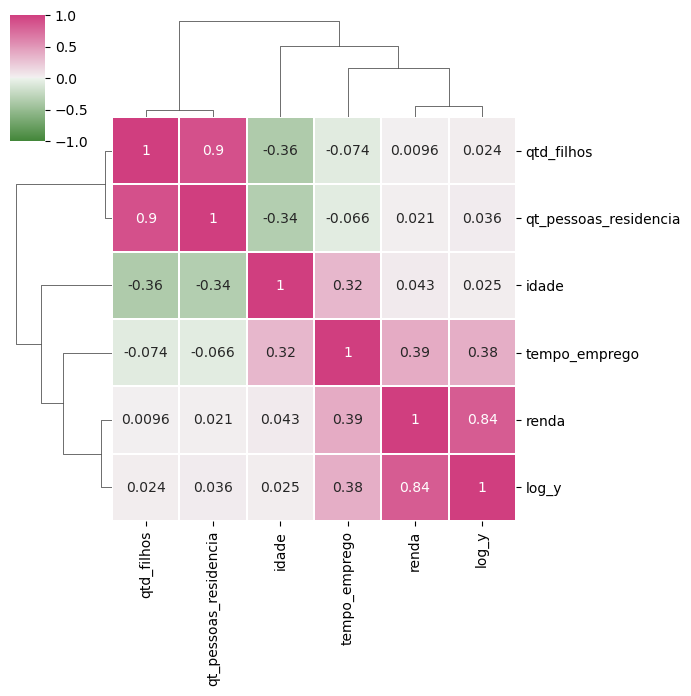

In [164]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 1, center = 'light')
sns.clustermap(df_quanti.corr(), figsize=(7, 7), center = 0, cmap=cmap, vmin=-1, vmax=1, linewidths=0.01, annot=True)
sns.clustermap(df_log.corr(), figsize=(7, 7), center = 0, cmap=cmap, vmin=-1, vmax=1, linewidths=0.01, annot=True)
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Acho que altererou irrelavantemente os resultados, dessa forma não vi efeitos negativos ou pistivos 